# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

perplexity = 4 Spend_time: 1.8711936473846436
perplexity = 6 Spend_time: 2.116431951522827
perplexity = 9 Spend_time: 2.524254083633423
perplexity = 14 Spend_time: 2.746689558029175
perplexity = 21 Spend_time: 3.2822179794311523
perplexity = 30 Spend_time: 4.001327991485596
perplexity = 45 Spend_time: 4.872022390365601
perplexity = 66 Spend_time: 4.73232889175415
perplexity = 100 Spend_time: 8.49930214881897
perplexity = 150 Spend_time: 6.954380035400391
perplexity = 200 Spend_time: 7.2137439250946045


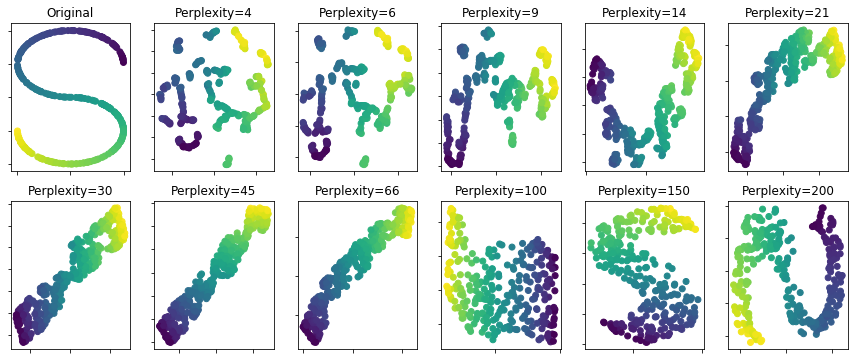

In [13]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 6, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100, 150, 200]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)
# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)
for i , perplexity in enumerate(perplexities):
    if i < 5:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-5]
    tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0, perplexity = perplexity)
    start_time = time()
    Z = tsne.fit_transform(X)
    duration_time = time()-start_time
    print('perplexity =', perplexity,  'Spend_time:', duration_time)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Z[:,0], Z[:,1] , c = color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()


In [ ]:
### 1.隨著 perplexity 越多 ==> 所花時間越長
### 2. 隨著 perplexity 越多 ==> 資料越不零散,且較能還原真實形狀